In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from IPython.display import Image


In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Data Analysis
# 1. Get information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

In [4]:
# 2. Find the correlation between all fields
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


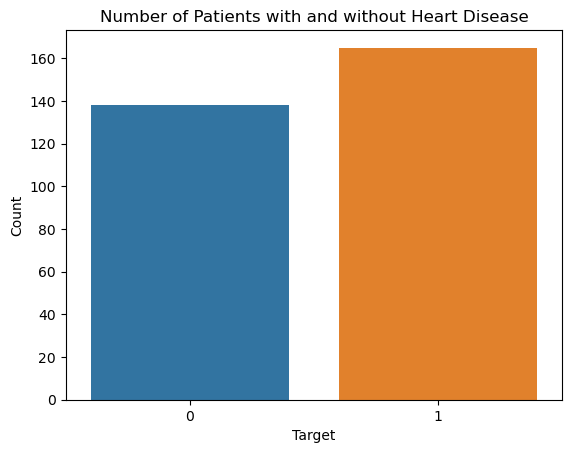

In [5]:
# Data Visualization
# a. Visualize the number of patients having a heart disease and not having a heart disease
sns.countplot(x='target', data=df)
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

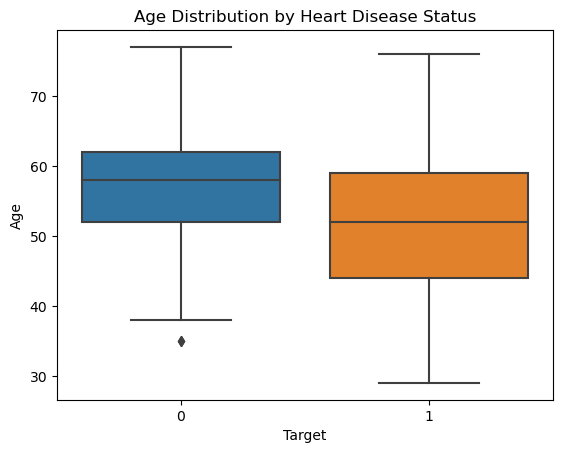

In [6]:
# b. Visualize the age and whether a patient has disease or not
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

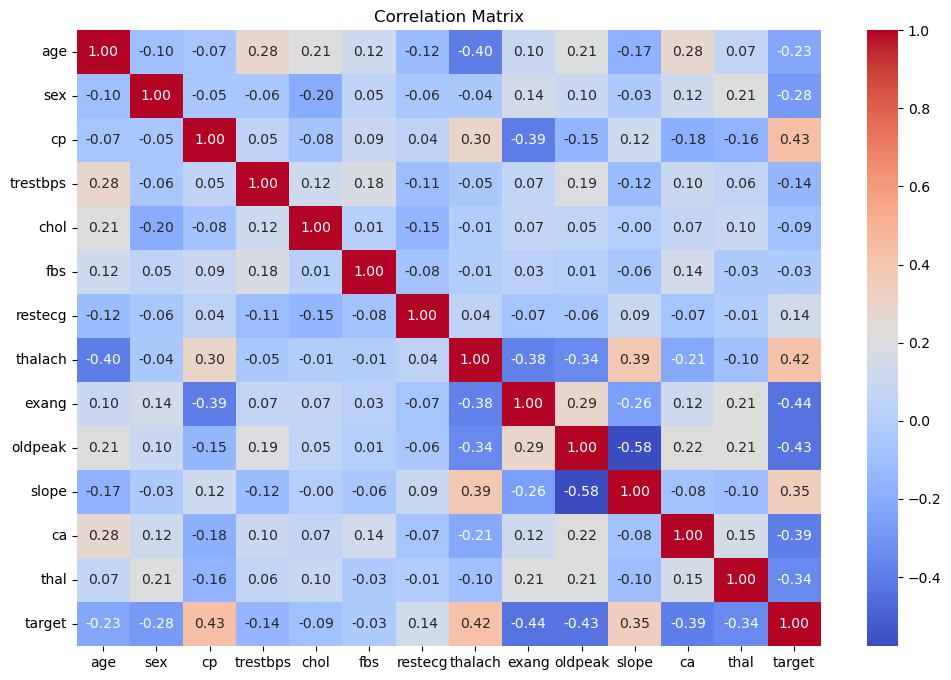

In [7]:
# c. Visualize correlation between all features using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Logistic Regression
# 1. Divide the dataset into train and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# 2. Build the model on train set and predict the values on the test set
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# 3. Build the confusion matrix and get the accuracy score
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Confusion Matrix:
 [[32  9]
 [ 8 42]]
Logistic Regression Accuracy: 0.8131868131868132


In [11]:
# Decision Tree
# 1. Build a decision tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [12]:
# 2. Build the confusion matrix and calculate the accuracy
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Confusion Matrix:
 [[33  8]
 [15 35]]
Decision Tree Accuracy: 0.7472527472527473


In [13]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pydotplus
import os

In [33]:
os.environ["PATH"] += os.pathsep + 'D:/Anaconda/Lib/site-packages/pydotplus/'

In [35]:
### Visualize the decision tree using the Graphviz package
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

# Export the decision tree to a Graphviz dot file
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=X.columns, filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [21]:
# Random Forest
# 1. Build a Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)



In [22]:
# 2. Build the confusion matrix and calculate the accuracy
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Confusion Matrix:
 [[33  8]
 [11 39]]
Random Forest Accuracy: 0.7912087912087912


In [23]:
# Select the best model
# a. Print the confusion matrix of all classifiers
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)


Logistic Regression Confusion Matrix:
 [[32  9]
 [ 8 42]]
Decision Tree Confusion Matrix:
 [[33  8]
 [15 35]]
Random Forest Confusion Matrix:
 [[33  8]
 [11 39]]


In [24]:
# b. Print the classification report of all classifiers
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.81      0.70      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

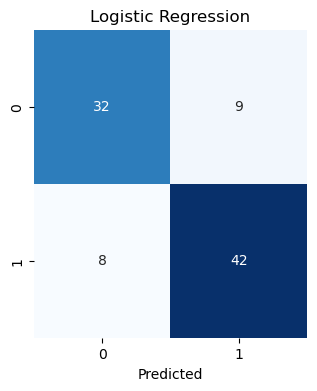

In [25]:
# d. Visualize confusion matrix using heatmaps
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel